In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from lib import ClassWrap
from lib import general_methods as gm
%matplotlib inline

#Each run is an instance of PyHEG
run = ClassWrap.PyHEG(rs=3.0, ndim=3, Nk=5)

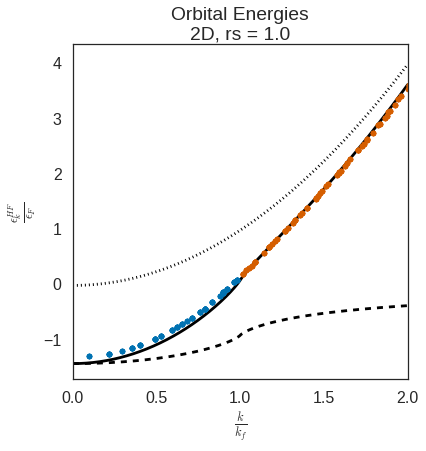

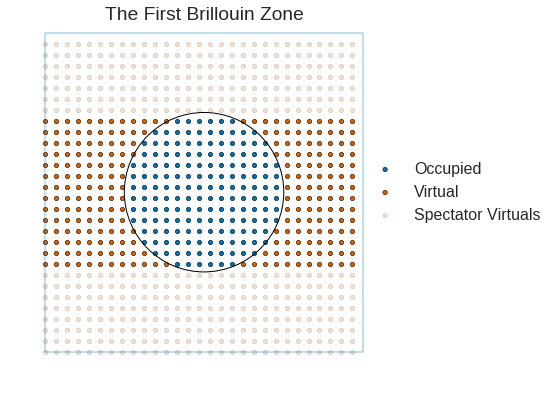

In [2]:
run.Nk = 30 
run.ndim = 2
run.rs = 1.0



sns.set_palette('colorblind')
sns.set_style('white')
sns.set_context('poster')
run.get_resulting_params()
figlen = 6
fig = plt.figure(figsize=(figlen,figlen))
run.plot_energy()
plt.show()
#fig = plt.figure(figsize=(figlen,figlen))
#run.plot_exc_hist()
#plt.show()
fig = plt.figure(figsize=(figlen,figlen))
run.plot_1stBZ()
plt.show()

In [3]:
"""
import sys
import time
evals = []
kpoints = []
times = []
davtimes = []
davvals = []
for i in range(5, 35):
        run.Nk = i
        run.ndim = 2
        run.get_resulting_params()        
        if np.all(run.exc_energies > 0):
            run.mv_is_working()
            t1 =  time.time()
            vals, vecs = np.linalg.eigh(run.mattest)
            t2 = time.time()
            evals.append(np.amin(vals))
            kpoints.append(run.Nk)
            times.append(t2-t1)
            t1 = time.time()
            run.davidson(blocksize=4)
            t2 = time.time()
            davvals.append(np.amin(run.dav_vals))
            davtimes.append(t2 - t1)
"""

'\nimport sys\nimport time\nevals = []\nkpoints = []\ntimes = []\ndavtimes = []\ndavvals = []\nfor i in range(5, 35):\n        run.Nk = i\n        run.ndim = 2\n        run.get_resulting_params()        \n        if np.all(run.exc_energies > 0):\n            run.mv_is_working()\n            t1 =  time.time()\n            vals, vecs = np.linalg.eigh(run.mattest)\n            t2 = time.time()\n            evals.append(np.amin(vals))\n            kpoints.append(run.Nk)\n            times.append(t2-t1)\n            t1 = time.time()\n            run.davidson(blocksize=4)\n            t2 = time.time()\n            davvals.append(np.amin(run.dav_vals))\n            davtimes.append(t2 - t1)\n'

In [4]:
"""
from scipy import stats
plt.figure(figsize=(5,5))
plt.plot(kpoints, evals, 'o', zorder=2, markersize=9)
plt.plot(kpoints, davvals, 'o', zorder=3, markersize=6, c=sns.color_palette()[2])
plt.plot(kpoints, [np.average(evals[-5:]) for i in range(len(kpoints))], c=sns.color_palette()[2], zorder=1, linewidth=2)
plt.plot(kpoints, [0 for i in range(len(kpoints))], 'k:', zorder=1, linewidth=2)
plt.ylabel('Lowest Eigenvalue')
plt.xlabel('# of K-points per Dimension')
plt.tight_layout()
plt.title('rs = ' + str(run.rs) + ', ' + str(run.ndim) + 'D')
plt.savefig('../images/conv_10-04-2016.eps', format='eps')
plt.show()
plt.figure(figsize=(5,5))
plt.plot(kpoints, times, 'o', markersize=6, zorder=2)
plt.plot(kpoints, davtimes, 'o', markersize=6, zorder=3, c=sns.color_palette()[2])
cutoff = 3
slope, intercept, r_value, p_value, std_err = stats.linregress(logk[-cutoff:],logt[-cutoff:])
kpoints = np.asarray(kpoints)
plt.plot(kpoints, slope*kpoints + intercept, c=sns.color_palette()[0], zorder=1, linewidth=2)
"""

"\nfrom scipy import stats\nplt.figure(figsize=(5,5))\nplt.plot(kpoints, evals, 'o', zorder=2, markersize=9)\nplt.plot(kpoints, davvals, 'o', zorder=3, markersize=6, c=sns.color_palette()[2])\nplt.plot(kpoints, [np.average(evals[-5:]) for i in range(len(kpoints))], c=sns.color_palette()[2], zorder=1, linewidth=2)\nplt.plot(kpoints, [0 for i in range(len(kpoints))], 'k:', zorder=1, linewidth=2)\nplt.ylabel('Lowest Eigenvalue')\nplt.xlabel('# of K-points per Dimension')\nplt.tight_layout()\nplt.title('rs = ' + str(run.rs) + ', ' + str(run.ndim) + 'D')\nplt.savefig('../images/conv_10-04-2016.eps', format='eps')\nplt.show()\nplt.figure(figsize=(5,5))\nplt.plot(kpoints, times, 'o', markersize=6, zorder=2)\nplt.plot(kpoints, davtimes, 'o', markersize=6, zorder=3, c=sns.color_palette()[2])\ncutoff = 3\nslope, intercept, r_value, p_value, std_err = stats.linregress(logk[-cutoff:],logt[-cutoff:])\nkpoints = np.asarray(kpoints)\nplt.plot(kpoints, slope*kpoints + intercept, c=sns.color_palette()[

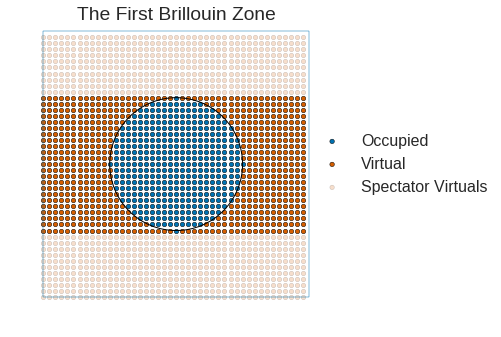

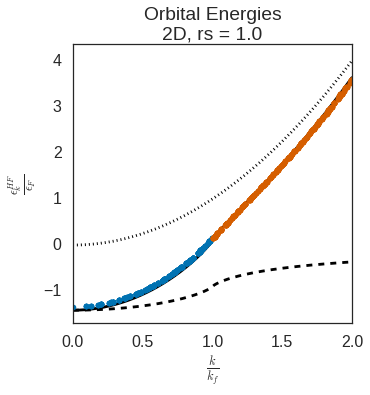

False


In [5]:
run.Nk = 45
run.get_resulting_params()
fig = plt.figure(figsize=(5,5))
run.plot_1stBZ()
plt.show()
fig = plt.figure(figsize=(5,5))
run.plot_energy()
plt.show()
print np.all(run.exc_energies > 0)

In [6]:
from scipy.sparse.linalg import LinearOperator, eigsh
run.Nk = 20
run.get_resulting_params()
%time run.davidson(blocksize=3)
print 2*run.Nexc

CPU times: user 18.5 s, sys: 40 ms, total: 18.5 s
Wall time: 9.41 s
1624


In [7]:
import time
times = []
for i in range(100):
    t1 = time.time()
    x = np.random.rand(2*run.Nexc)
    run.mvprod(x)
    t2 = time.time()
    times.append(t2-t1)
print times

[0.07129287719726562, 0.07048988342285156, 0.0770559310913086, 0.07757210731506348, 0.07271599769592285, 0.0675959587097168, 0.06872701644897461, 0.06647896766662598, 0.06769800186157227, 0.06740999221801758, 0.06821513175964355, 0.06815099716186523, 0.06720900535583496, 0.06992197036743164, 0.06853604316711426, 0.06769108772277832, 0.06767606735229492, 0.06604909896850586, 0.06617093086242676, 0.06551504135131836, 0.06596803665161133, 0.06575703620910645, 0.06614494323730469, 0.06599092483520508, 0.06563019752502441, 0.06567907333374023, 0.06554889678955078, 0.06587791442871094, 0.0656130313873291, 0.06609702110290527, 0.06762886047363281, 0.07031106948852539, 0.06813597679138184, 0.06890583038330078, 0.06589794158935547, 0.06605315208435059, 0.06630611419677734, 0.0658118724822998, 0.06559085845947266, 0.06564497947692871, 0.06563496589660645, 0.0659170150756836, 0.0664520263671875, 0.06627702713012695, 0.06586098670959473, 0.06552886962890625, 0.06557416915893555, 0.0662400722503662

In [8]:
times =  np.asarray(times)
print times[np.where(times > 0.07)]
for i in times:
    print i

[ 0.07129288  0.07048988  0.07705593  0.07757211  0.072716    0.07031107
  0.07140517  0.071738    0.07586813  0.07076097]
0.0712928771973
0.0704898834229
0.0770559310913
0.0775721073151
0.0727159976959
0.0675959587097
0.068727016449
0.0664789676666
0.0676980018616
0.067409992218
0.0682151317596
0.0681509971619
0.0672090053558
0.0699219703674
0.0685360431671
0.0676910877228
0.0676760673523
0.0660490989685
0.0661709308624
0.0655150413513
0.0659680366516
0.0657570362091
0.0661449432373
0.0659909248352
0.065630197525
0.0656790733337
0.0655488967896
0.0658779144287
0.0656130313873
0.0660970211029
0.0676288604736
0.0703110694885
0.0681359767914
0.0689058303833
0.0658979415894
0.0660531520844
0.0663061141968
0.0658118724823
0.0655908584595
0.0656449794769
0.0656349658966
0.0659170150757
0.0664520263672
0.0662770271301
0.0658609867096
0.0655288696289
0.0655741691589
0.0662400722504
0.0657908916473
0.0656418800354
0.0663721561432
0.0661559104919
0.0663199424744
0.0658311843872
0.0657291412354


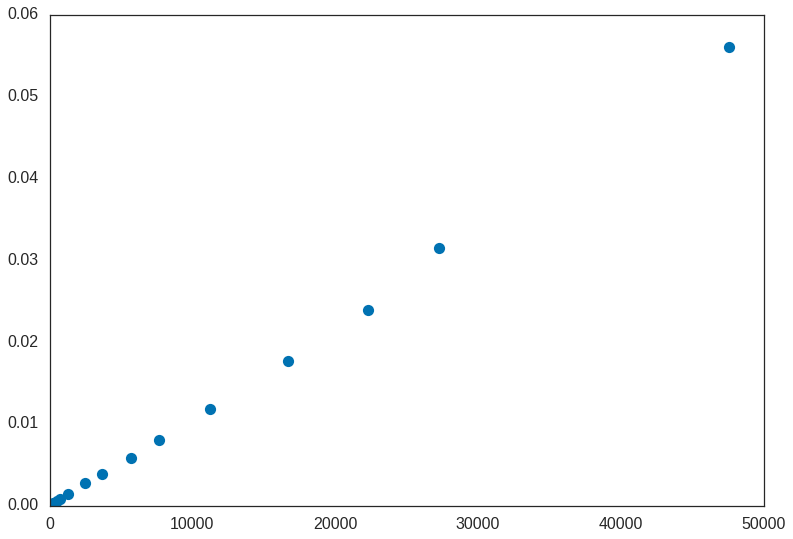

In [9]:
times = []
ns= []
nos = []
nexcs = []
xthing = []
for i in range(5, 20):
    n = 2*run.Nexc
    tim = []
    run.Nk = i 
    run.get_resulting_params()
    for j in range(5):
        x = np.random.rand(n)
        t1 = time.time()
        run.mvprod(x)
        t2 =  time.time()
        tim.append(t2 - t1)
    times.append(np.average(tim))
    ns.append(n)
    nos.append(run.Nocc)
    nexcs.append(run.Nexc)
    xthing.append(run.Nocc * run.Nexc)
    

plt.figure()
plt.plot(xthing, times, 'o') 
plt.show()

In [10]:
run.Nk = 20
run.get_resulting_params()
guess = np.random.rand(2*run.Nexc, 3)

run.davidson(guess_evecs=guess, blocksize=3)

/home/evan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
